# Classifier
> This is the class that creates the dictionary model

In [1]:
#| default_exp Classifier

In [113]:
#| hide
from nbdev.showdoc import *
from matplotlib import pyplot as plt

In [106]:
#| export
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [88]:
#negative_words file
df = pd.read_csv('negative_words.csv')
df = df.drop(columns=['original']) #drop it since it contains the concept with an * in it

neg_words = [] 
for _, row in df.iterrows():
    for item in row:
        if pd.notnull(item):
            neg_words.append(item)

In [89]:
#Drop duplicates in neg_words:
neg_words = list(set(neg_words))

len(neg_words)

1599

In [90]:
#moral_foundations_dictionary file:
df = pd.read_csv('moral_foundations_dictionary_1.0.csv')
df = df[['categories','word_examples']]

virtue = []
vice = []
for _, row in df.iterrows():
    if pd.notnull(row['word_examples']):
        words = row['word_examples'].split(',')
        if 'Virtue' in row['categories']:
            virtue.extend(words)
        elif 'Vice' in row['categories']:
            vice.extend(words)
        else:
            print(words)




['moralidad']
['moral']
['etica']
['etico']
['principios']
['valores']
['bueno', ' buena']
['bondadoso']
['correcto']
['erroneo', ' equivocado', ' incorrecto', ' malo']
['justicia']
['fechoria', ' pecado', ' indebido']
['virtud']
['vicioso']
['moralidad']
['etica']


In [91]:
virtue.extend(['moralidad','moral','etica','etico','principios','valores','bueno','buena','bondadoso','correcto','justicia','virtud','moralidad','etica'])
vice.extend(['erroneo','equivocado','incorrecto','malo','fechoria','pecado','indebido','vicioso'])
#Drop duplicates in virtue and vice:
virtue = list(set(virtue))
vice = list(set(vice))

print('vice examples: ', vice[:10])
print('virtue examples: ', virtue[:10])

vice examples:  ['arruinar', ' explotado', 'espionaje', 'delatar', 'desertar', 'aplastar', ' triturar', ' extraño', 'abandono', ' destruir']
virtue examples:  [' sometido', 'patriotico', 'recto', ' cuadros', 'guadian', 'patria', ' controlar', ' vigilar', ' autoritario', 'legalidad']


In [92]:
#Load the vectors data frame:
def load_embeddings(file_path):
    word_to_vec = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            word_to_vec[word] = vector
    return word_to_vec

word_to_vec = load_embeddings('vectorspol.txt')

In [94]:
one = set(vice)
two = set(neg_words)

vice = list(one.union(two))

In [95]:
print(len(vice)+len(virtue))

1936


In [96]:
#| export
class Classifier:
    def __init__(self):
        self.embeddings = None
        self.vice = None
        self.virtue = None

    def load_embeddings(file_path):
        '''Loads the embeddings from a file and returns a dictionary with the words as keys and the vectors as values'''
        word_to_vec = {}
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                values = line.split()
                word = values[0]
                vector = np.array(values[1:], dtype='float32')
                print(vector.shape)
                word_to_vec[word] = vector
        self.embeddings = word_to_vec
        return word_to_vec
    
    
    def list_to_vec(vice, virtue, word_to_vec):
        '''Returns the vector representation of a list of words in a df'''
        data = {'word': [], 'vector': [], 'category': []}
        for word in vice:
            if word in word_to_vec.keys():
                data['word'].append(word)
                data['vector'].append(word_to_vec[word])
                data['category'].append(0.0) #vice will be represented as 0
            else:
                data['word'].append(word)
                data['vector'].append(np.nan)
                data['category'].append(0.0) 
        
        for word in virtue:
            if word in word_to_vec.keys():
                data['word'].append(word)
                data['vector'].append(word_to_vec[word])
                data['category'].append(1.0) #virtue will be represented as 1
            else:
                data['word'].append(word)
                data['vector'].append(np.nan)
                data['category'].append(1.0)

        df = pd.DataFrame(data)
        return df

In [97]:
def list_to_vec(vice, virtue, word_to_vec):
    '''Returns the vector representation of a list of words in a df'''
    data = {'word': [], 'vector': [], 'category': []}
    for word in vice:
        if word in word_to_vec.keys():
            data['word'].append(word)
            data['vector'].append(word_to_vec[word])
            data['category'].append(0.0) #vice will be represented as 0
        else:
            data['word'].append(word)
            data['vector'].append(np.nan)
            data['category'].append(0.0) 
    
    for word in virtue:
        if word in word_to_vec.keys():
            data['word'].append(word)
            data['vector'].append(word_to_vec[word])
            data['category'].append(1.0) #virtue will be represented as 1
        else:
            data['word'].append(word)
            data['vector'].append(np.nan)
            data['category'].append(1.0)

    df = pd.DataFrame(data)
    return df

df = list_to_vec(vice,virtue,word_to_vec)
total = len(df)
print('Total words: ',total)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
print('Total words after dropping NaN: ',len(df))
print('∆: ',total-len(df))
print('∆%:', round((total-len(df))/total*100,2) )
df

Total words:  1936
Total words after dropping NaN:  1015
∆:  921
∆%: 47.57


,word,vector,category
0,enfadado,"[0.331249, -0.051375, 0.114062, 0.006835, 0.25...",0.0
1,combativo,"[-0.524794, 0.377421, -0.451236, -0.278488, 0....",0.0
2,arruinar,"[0.369527, 0.341969, 0.576228, 0.253873, -0.11...",0.0
3,fatal,"[-0.077049, -1.069112, 0.972782, 0.419374, 0.0...",0.0
4,furia,"[0.167831, -0.13676, 0.101164, 0.180804, -0.24...",0.0
...,...,...,...
1010,justo,"[0.2676, 0.02936, 0.478917, 0.353459, 0.068529...",1.0
1011,equidad,"[-0.05194, -0.447539, -0.369943, 0.367933, 0.3...",1.0
1012,seguir,"[0.929292, 0.084175, -0.086734, 0.031077, -0.4...",1.0
1013,equivalente,"[0.072723, -0.031619, -0.847589, 0.129053, -0....",1.0


In [98]:
df[df['category'] == 0.0]

,word,vector,category
0,enfadado,"[0.331249, -0.051375, 0.114062, 0.006835, 0.25...",0.0
1,combativo,"[-0.524794, 0.377421, -0.451236, -0.278488, 0....",0.0
2,arruinar,"[0.369527, 0.341969, 0.576228, 0.253873, -0.11...",0.0
3,fatal,"[-0.077049, -1.069112, 0.972782, 0.419374, 0.0...",0.0
4,furia,"[0.167831, -0.13676, 0.101164, 0.180804, -0.24...",0.0
...,...,...,...
896,mentira,"[0.018032, -0.723217, 0.51755, 0.501916, -0.35...",0.0
897,contiendas,"[-0.320461, -0.862633, 0.520723, 0.02839, -0.0...",0.0
898,preocupo,"[0.022981, 0.441229, 0.015648, -0.033112, 0.22...",0.0
899,teme,"[0.104233, -0.136537, -0.013065, 0.150914, -0....",0.0


In [99]:
df[df['category'] == 1.0].reset_index(drop=True)

,word,vector,category
0,patriotico,"[-0.391148, -0.314462, -0.495306, -0.404786, -...",1.0
1,recto,"[-0.021141, 0.448575, -0.220464, 0.467975, 0.2...",1.0
2,patria,"[0.003204, -0.04956, -0.590258, -0.435866, 0.0...",1.0
3,legalidad,"[-0.301906, -0.196408, -0.416985, 0.346942, 0....",1.0
4,legitimidad,"[-0.043358, -0.593217, -0.050186, 0.157775, 0....",1.0
...,...,...,...
109,justo,"[0.2676, 0.02936, 0.478917, 0.353459, 0.068529...",1.0
110,equidad,"[-0.05194, -0.447539, -0.369943, 0.367933, 0.3...",1.0
111,seguir,"[0.929292, 0.084175, -0.086734, 0.031077, -0.4...",1.0
112,equivalente,"[0.072723, -0.031619, -0.847589, 0.129053, -0....",1.0


In [131]:
X_train, X_test, y_train, y_test = train_test_split(df['vector'], df['category'], test_size=0.2, random_state=21,stratify=df['category'])


In [132]:
X_train = X_train.to_list()


In [133]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [134]:
X_test = X_test.to_list()

In [135]:
print(round(knn.score(X_test, y_test),3))

0.926


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


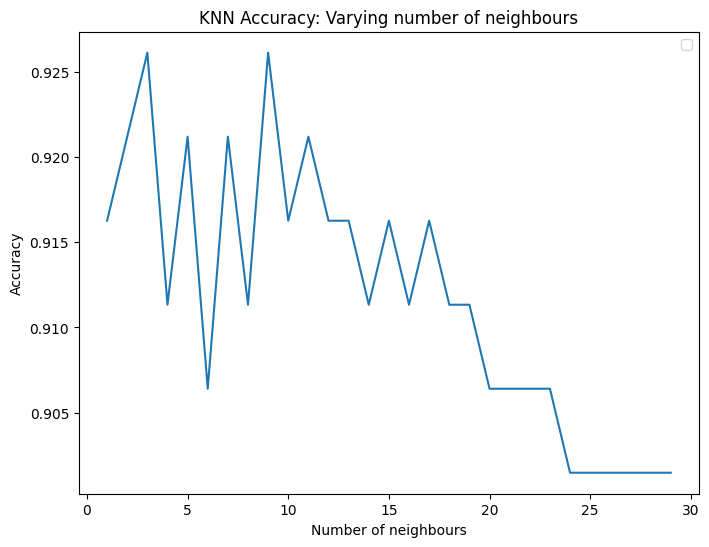

Best accuracy and number of neighbours:  (3, 0.9261083743842364)


In [137]:
test_accuracies = {}
neighbours = range(1, 30)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    test_accuracies[neighbour] = knn.score(X_test, y_test)
    
plt.figure(figsize=(8,6))
plt.title('KNN Accuracy: Varying number of neighbours')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()))
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

print('Best accuracy and number of neighbours: ', max(test_accuracies.items(), key=lambda x: x[1]))